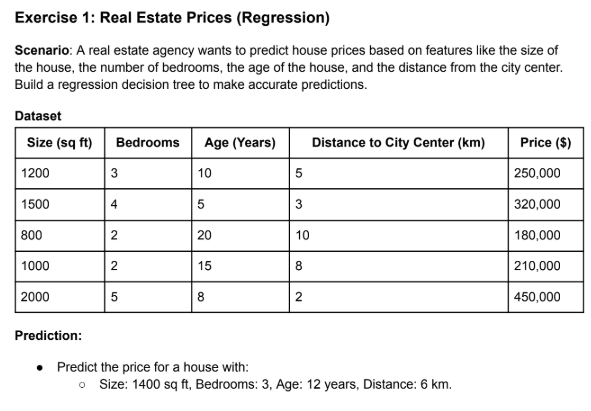

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Import needed Library

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

## Make Dataset

In [6]:
data = {
    'size': [1200, 1500, 800, 1000, 2000],
    'bedrooms': [3, 4, 2, 2, 5],
    'age': [10, 5, 20, 15, 8],
    'distance': [5, 3, 10, 8, 2],
    'price': [250000, 320000, 180000, 210000, 450000]
}
dataset = pd.DataFrame(data)
dataset

,size,bedrooms,age,distance,price
0,1200,3,10,5,250000
1,1500,4,5,3,320000
2,800,2,20,10,180000
3,1000,2,15,8,210000
4,2000,5,8,2,450000


## Features and labels


In [8]:
X = dataset[['size', 'bedrooms', 'age', 'distance']]
y = dataset['price']

## Regression model


In [10]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

# Predict the price for a house with given features

In [12]:
predicted_price = regressor.predict([[1400, 3, 12, 6]])
print(f"Predicted price for the house: ${predicted_price[0]:,.2f}")

Predicted price for the house: $250,000.00


# Visualize the decision tree regression for size

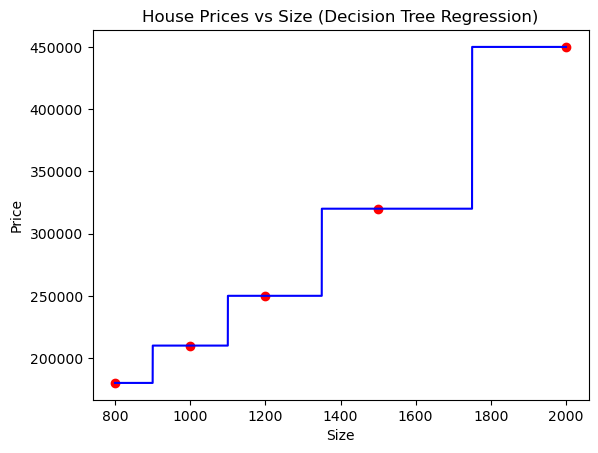

In [14]:
X_size = dataset[['size']]
regressor_size = DecisionTreeRegressor(random_state=0)
regressor_size.fit(X_size, y)

X_grid = np.arange(min(X_size.values), max(X_size.values), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X_size, y, color='red')
plt.plot(X_grid, regressor_size.predict(X_grid), color='blue')
plt.title('House Prices vs Size (Decision Tree Regression)')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

# Export the decision tree to a .dot file

In [16]:
export_graphviz(regressor, out_file='tree.dot', 
               feature_names=['size', 'bedrooms', 'age', 'distance'],
               filled=True, rounded=True, special_characters=True)

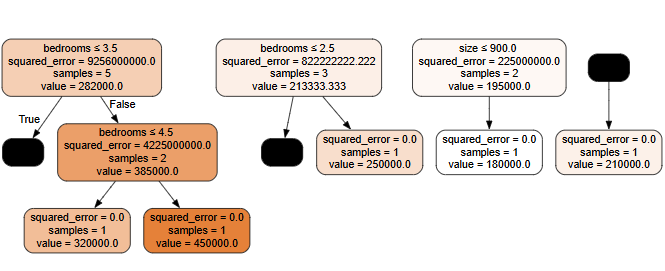